## **Importing the Necessary Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from rapidfuzz import process

## **Reading the Data**


In [2]:
data = pd.read_csv(
    "C:/Users/harsh/Desktop/Internships/Unified-mentor-data-science/Project-list/advanced/crop-analysis-project/Crop Production data.csv"
)

In [3]:
print(data.columns)
data.head()

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


## **EDA**


### Concise Summary of DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


### Identify Numeric/Object Columns in DataFrame


In [5]:
numeric_columns = data.select_dtypes("number").columns.tolist()
non_numeric_columns = data.select_dtypes("object").columns.tolist()
print("Numeric columns: ", numeric_columns, "\nNon-numeric columns:", non_numeric_columns)

Numeric columns:  ['Crop_Year', 'Area', 'Production'] 
Non-numeric columns: ['State_Name', 'District_Name', 'Season', 'Crop']


### Statistical Summary of Numerical Columns


In [6]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


### Missing values and Number of Unique values in Object columns


In [7]:
missing_values = data.isnull().sum()

unique_values = {
    "State_Name": data["State_Name"].nunique(),
    "District_Name": data["District_Name"].nunique(),
    "Season": data["Season"].nunique(),
    "Crop": data["Crop"].nunique(),
}
missing_values, unique_values

(State_Name          0
 District_Name       0
 Crop_Year           0
 Season              0
 Crop                0
 Area                0
 Production       3730
 dtype: int64,
 {'State_Name': 33, 'District_Name': 646, 'Season': 6, 'Crop': 124})

### Bar Plot of Crops with Counts > 500

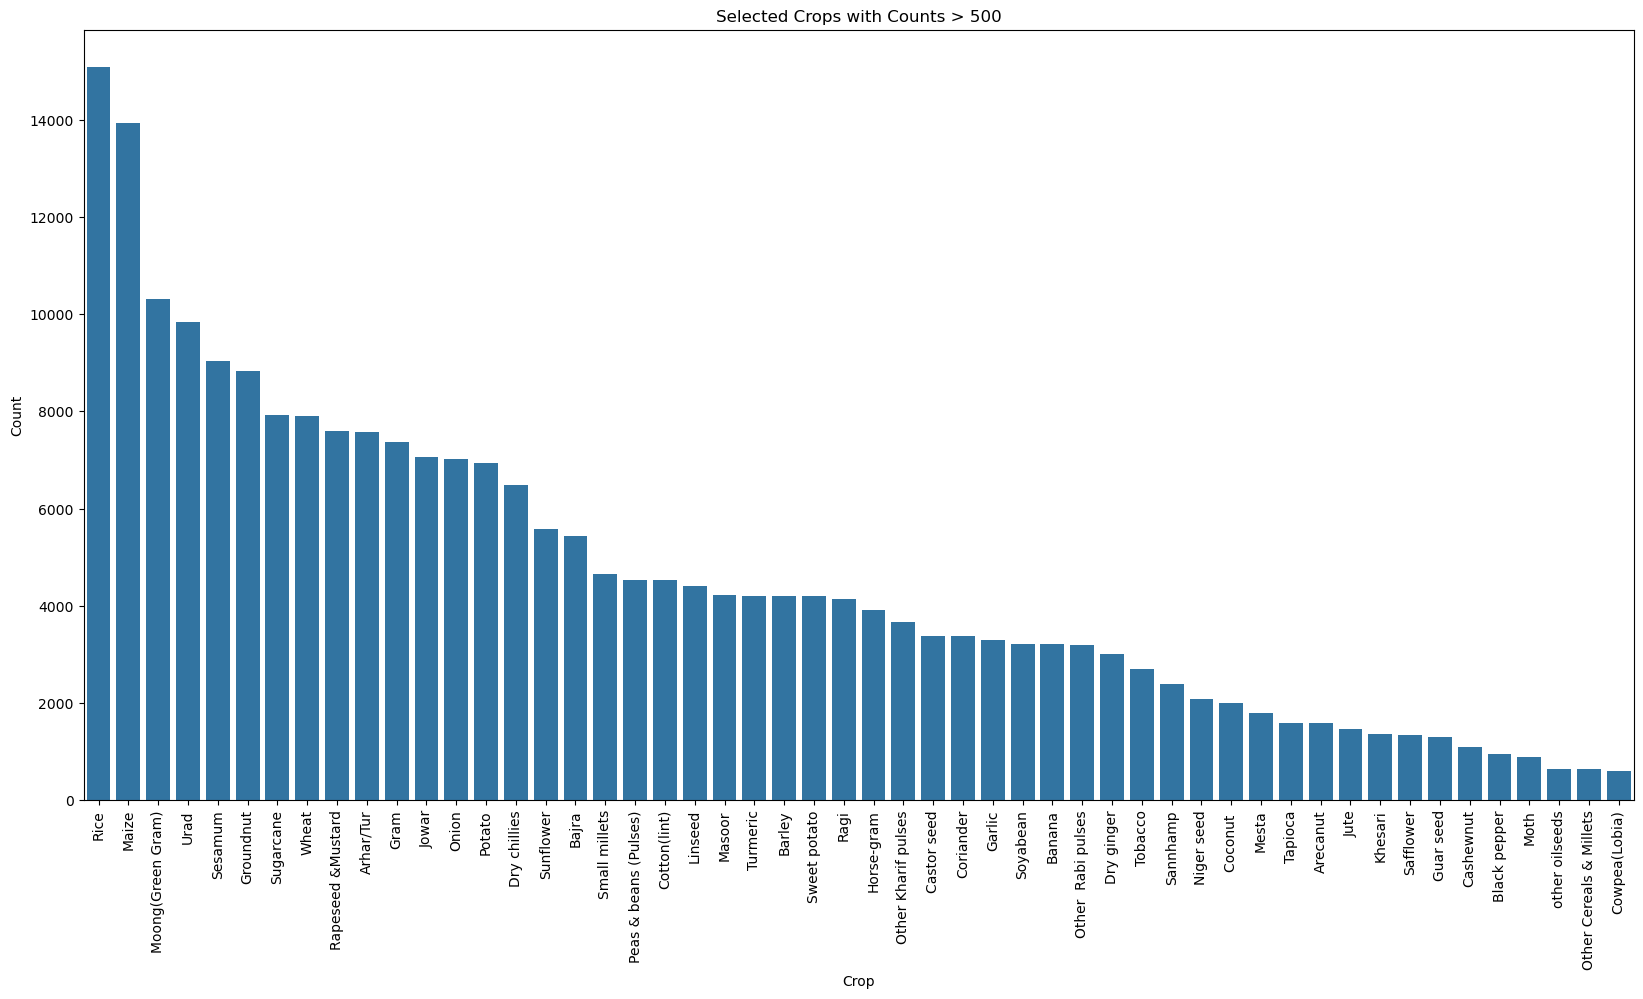

In [8]:
crop_counts = data['Crop'].value_counts()
selected_crops = crop_counts[crop_counts > 500]
plt.figure(figsize=(20, 10))
sns.barplot(data=pd.DataFrame(selected_crops), x='Crop', y='count')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Selected Crops with Counts > 500')
plt.show()

###  Handle Missing Values and Duplicates


In [9]:
data.dropna(axis=0, inplace=True)
data.drop_duplicates(inplace=True)
data.isna().any(), len(data)

(State_Name       False
 District_Name    False
 Crop_Year        False
 Season           False
 Crop             False
 Area             False
 Production       False
 dtype: bool,
 242361)

### Apply String Stripping to Selected Columns


In [10]:
for column in non_numeric_columns:
    data[column] = data[column].apply(lambda x: x.strip())

### Consolidate Crop Seasons and Create New 'Cropping_Season' Column


In [11]:
print(data["Season"].unique(), unique_values["Season"])

['Kharif' 'Whole Year' 'Autumn' 'Rabi' 'Summer' 'Winter'] 6


In [12]:
season_map = {
    "Kharif": "Kharif",
    "Rabi": "Rabi",
    "Whole Year": "Whole Year",
    "Autumn": "Zaid",
    "Summer": "Zaid",
    "Winter": "Rabi",
}

data["Cropping_Season"] = data["Season"].apply(lambda x: season_map.get(x))
data["Cropping_Season"].value_counts()

Cropping_Season
Kharif        94283
Rabi          72210
Whole Year    56127
Zaid          19741
Name: count, dtype: int64

### Visualize Crop Production & Area Distribution by Cropping Season


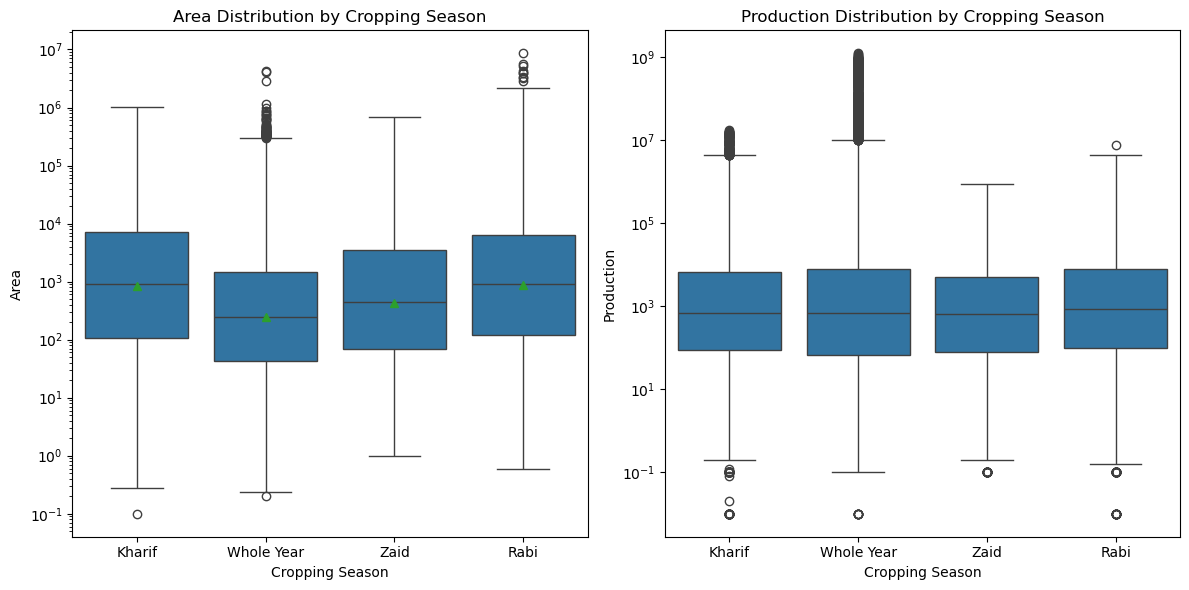

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(
    x="Cropping_Season", y="Area", showmeans=True, data=data, ax=ax1, log_scale=True
)
ax1.set_title("Area Distribution by Cropping Season")
ax1.set_xlabel("Cropping Season")
ax1.set_ylabel("Area")

sns.boxplot(
    x="Cropping_Season",
    y="Production",
    showmeans=True,
    data=data,
    ax=ax2,
    log_scale=True,
)
ax2.set_title("Production Distribution by Cropping Season")
ax2.set_xlabel("Cropping Season")
ax2.set_ylabel("Production")

plt.tight_layout()
plt.show()

### Production & Area Trends by Crop Year


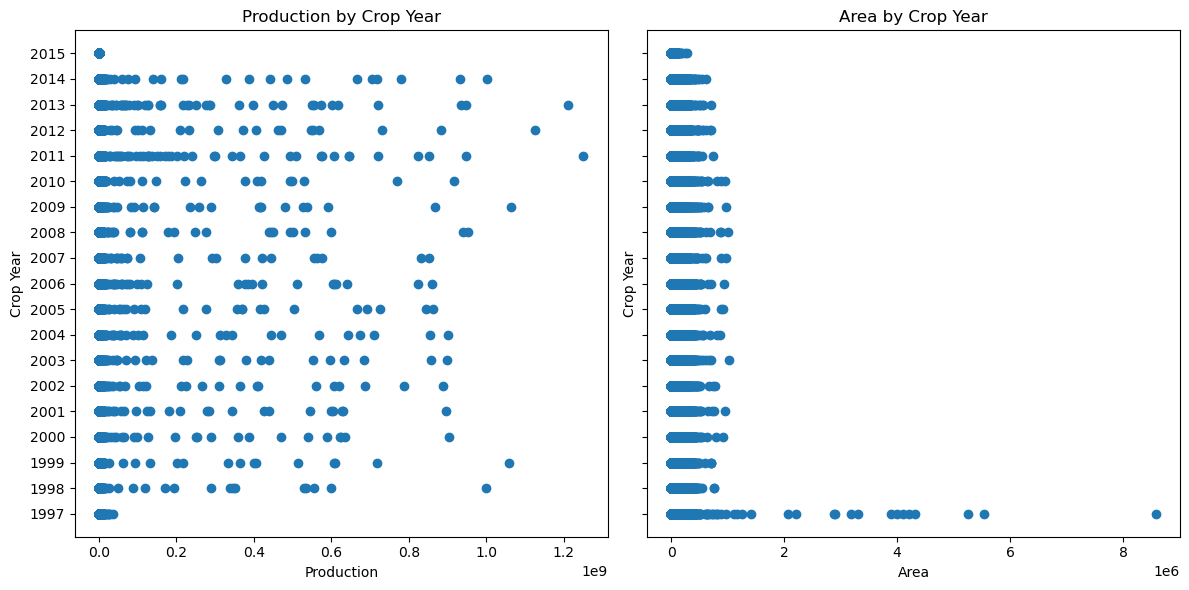

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plt.yticks(sorted(data["Crop_Year"].unique()))

ax1.scatter(x="Production", y="Crop_Year", data=data)
ax1.set_title("Production by Crop Year")
ax1.set_xlabel("Production")
ax1.set_ylabel("Crop Year")

ax2.scatter(x="Area", y="Crop_Year", data=data)
ax2.set_title("Area by Crop Year")
ax2.set_xlabel("Area")
ax2.set_ylabel("Crop Year")

plt.tight_layout()
plt.show()

### Create "Zone" Column Using State Name Mapping


In [15]:
print(data["State_Name"].unique())

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [16]:
zone_data = {
    "West Zone": [
        "Rajasthan",
        "Madhya Pradesh",
        "Gujarat",
        "Dadra and Nagar Haveli",
        "Maharashtra",
        "Goa",
    ],
    "South Zone": [
        "Andhra Pradesh",
        "Karnataka",
        "Kerala",
        "Tamil Nadu",
        "Telangana",
        "Puducherry",
        "Andaman and Nicobar Islands",
    ],
    "North Zone": [
        "Jammu and Kashmir",
        "Himachal Pradesh",
        "Punjab",
        "Chandigarh",
        "Uttarakhand",
        "Haryana",
        "Uttar Pradesh",
        "Delhi",
    ],
    "East Zone": [
        "Bihar",
        "Sikkim",
        "Jharkhand",
        "Odisha",
        "Chhattisgarh",
        "West Bengal",
        "Arunachal Pradesh",
        "Nagaland",
        "Manipur",
        "Mizoram",
        "Tripura",
        "Meghalaya",
        "Assam",
    ],
}

for zone, states in zone_data.items():
    data.loc[data["State_Name"].isin(states), "Zone"] = zone

data["Zone"].value_counts()

Zone
East Zone     81913
West Zone     56001
South Zone    54573
North Zone    49874
Name: count, dtype: int64

### Standardize and Correct Crop Names


In [17]:
crops_before_correction = data["Crop"].unique().tolist()
print(crops_before_correction)
print(len(crops_before_correction))

['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut', 'Coconut', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca', 'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric', 'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut', 'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram', 'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor', 'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses', 'Samai', 'Small millets', 'Coriander', 'Potato', 'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)', 'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango', 'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables', 'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard', 'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu', 'Garlic', 'Ginger', 'Oilseeds total', 'Pulses total', 'Jute', 'Peas & beans (Pulses)', 'Blackgram', 'Paddy', '

In [18]:
correct_crop_names = [
    "Arecanut",
    "Other Kharif Pulses",
    "Rice",
    "Banana",
    "Cashewnut",
    "Coconut",
    "Dry Ginger",
    "Sugarcane",
    "Sweet Potato",
    "Tapioca",
    "Black Pepper",
    "Dry Chilli",
    "Other Oilseeds",
    "Turmeric",
    "Maize",
    "Moong",
    "Urad",
    "Arhar",
    "Groundnut",
    "Sunflower",
    "Bajra",
    "Castor",
    "Cotton",
    "Horse Gram",
    "Jowar",
    "Korra",
    "Ragi",
    "Tobacco",
    "Gram",
    "Wheat",
    "Masoor",
    "Sesamum",
    "Linseed",
    "Safflower",
    "Onion",
    "Other Misc Pulses",
    "Samai",
    "Small Millets",
    "Coriander",
    "Potato",
    "Other Rabi Pulses",
    "Soyabean",
    "Beans and Mutter",
    "Bhindi",
    "Brinjal",
    "Citrus Fruit",
    "Cucumber",
    "Grapes",
    "Mango",
    "Orange",
    "Other Fibres",
    "Other Fresh Fruits",
    "Other Vegetables",
    "Papaya",
    "Pome Fruit",
    "Tomato",
    "Mesta",
    "Cowpea",
    "Lemon",
    "Pomegranate",
    "Sapota",
    "Cabbage",
    "Rapeseed and Mustard",
    "Peas",
    "Niger Seed",
    "Bottle Gourd",
    "Varagu",
    "Garlic",
    "Ginger",
    "Oilseeds Total",
    "Pulses Total",
    "Jute",
    "Peas and Beans",
    "Blackgram",
    "Paddy",
    "Pineapple",
    "Barley",
    "Sannhemp",
    "Khesari",
    "Guar Seed",
    "Moth",
    "Other Cereals and Millets",
    "Condiment Spices",
    "Turnip",
    "Carrot",
    "Radish",
    "Arecanut Processed",
    "Arecanut Raw",
    "Cashewnut Processed",
    "Cashewnut Raw",
    "Cardamom",
    "Rubber",
    "Bitter Gourd",
    "Drumstick",
    "Jackfruit",
    "Snake Guard",
    "Tea",
    "Coffee",
    "Cauliflower",
    "Other Citrus Fruits",
    "Watermelon",
    "Total Foodgrain",
    "Kapas",
    "Colocasia",
    "Lentil",
    "Bean",
    "Jobster",
    "Perilla",
    "Rajmash Kholar",
    "Ricebean",
    "Ash Gourd",
    "Beetroot",
    "Lablab",
    "Ribbed Guard",
    "Yam",
    "Pumpkin",
    "Apple",
    "Peach",
    "Pear",
    "Plum",
    "Litchi",
    "Ber",
    "Other Dry Fruit",
    "Jute and Mesta",
]


def correct_crop_name(crop):
    best_match = process.extractOne(crop, correct_crop_names, score_cutoff=80)
    return best_match[0] if best_match else crop


data["Crop"] = data["Crop"].apply(correct_crop_name)

data.drop_duplicates(inplace=True)

crops_after_correction = data["Crop"].unique().tolist()
print(crops_after_correction)
print(len(crops_after_correction))

['Arecanut', 'Other Kharif Pulses', 'Rice', 'Banana', 'Cashewnut', 'Coconut', 'Dry Ginger', 'Sugarcane', 'Sweet Potato', 'Tapioca', 'Black Pepper', 'Dry Chilli', 'Other Oilseeds', 'Turmeric', 'Maize', 'Moong', 'Urad', 'Arhar', 'Groundnut', 'Sunflower', 'Bajra', 'Castor', 'Cotton', 'Horse Gram', 'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor', 'Sesamum', 'Linseed', 'Safflower', 'Onion', 'Other Misc Pulses', 'Samai', 'Small Millets', 'Coriander', 'Potato', 'Other Rabi Pulses', 'Soyabean', 'Bean', 'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango', 'Orange', 'Other Fibres', 'Other Fresh Fruits', 'Other Vegetables', 'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed and Mustard', 'Peas', 'Niger Seed', 'Bottle Gourd', 'Varagu', 'Garlic', 'Ginger', 'Oilseeds Total', 'Pulses Total', 'Jute', 'Blackgram', 'Paddy', 'Pineapple', 'Barley', 'Sannhemp', 'Khesari', 'Guar Seed', 'Moth', 'Other Cereals and Millets',

In [19]:
corrected_crops = set(crops_before_correction).difference(set(crops_after_correction))
print("The following crops were removed from the field:")
for crop in corrected_crops:
    print(crop)

The following crops were removed from the field:
Drum Stick
Plums
Beet Root
Jute & mesta
Redish
Atcanut (Raw)
Jack Fruit
Arcanut (Processed)
Oilseeds total
Dry ginger
other misc. pulses
Sannhamp
Ricebean (nagadal)
Sweet potato
Pump Kin
Other Cereals & Millets
Black pepper
other oilseeds
Ribed Guard
Colocosia
Horse-gram
Guar seed
Beans & Mutter(Vegetable)
Snak Guard
Cotton(lint)
Other Citrus Fruit
Moong(Green Gram)
Peas  (vegetable)
Other Kharif pulses
Cowpea(Lobia)
Castor seed
Other  Rabi pulses
Pulses total
other fibres
Rapeseed &Mustard
Total foodgrain
Dry chillies
Water Melon
Small millets
Niger seed
Peas & beans (Pulses)
Arhar/Tur


### Categorize Crops by Type


In [20]:
categories = {
    "fruits": [
        "Banana",
        "Citrus Fruit",
        "Grapes",
        "Mango",
        "Orange",
        "Papaya",
        "Pome Fruit",
        "Pome Granet",
        "Sapota",
        "Watermelon",
        "Pineapple",
        "Apple",
        "Peach",
        "Pear",
        "Plum",
        "Litchi",
        "Ber",
        "Lemon",
        "Other Fresh Fruits",
        "Other Citrus Fruits",
    ],
    "vegetables": [
        "Sweet Potato",
        "Tapioca",
        "Onion",
        "Potato",
        "Tomato",
        "Cabbage",
        "Bottle Gourd",
        "Garlic",
        "Bitter Gourd",
        "Drumstick",
        "Snake Guard",
        "Cauliflower",
        "Turnip",
        "Carrot",
        "Radish",
        "Colocasia",
        "Ash Gourd",
        "Beetroot",
        "Lab-Lab",
        "Ribbed Guard",
        "Yam",
        "Pumpkin",
        "Bhindi",
        "Brinjal",
        "Cucumber",
        "Other Vegetables",
    ],
    "pulses": [
        "Other Kharif Pulses",
        "Moong",
        "Urad",
        "Arhar",
        "Gram",
        "Masoor",
        "Other Misc Pulses",
        "Other Rabi Pulses",
        "Pulses Total",
        "Blackgram",
        "Khesari",
        "Moth",
        "Rajmash Kholar",
        "Horse Gram",
        "Bean",
        "Cowpea",
        "Peas",
        "Guar Seed",
        "Lentil",
    ],
    "oilseeds": [
        "Groundnut",
        "Sunflower",
        "Castor",
        "Sesamum",
        "Linseed",
        "Safflower",
        "Niger Seed",
        "Soyabean",
        "Oilseeds Total",
        "Rapeseed and Mustard",
        "Other Oilseeds",
    ],
    "plantations": [
        "Arecanut",
        "Cashewnut",
        "Coconut",
        "Rubber",
        "Tea",
        "Coffee",
        "Sugarcane",
        "Tobacco",
    ],
    "condiments": [
        "Dry Ginger",
        "Black Pepper",
        "Dry Chilli",
        "Turmeric",
        "Coriander",
        "Cardamom",
        "Ginger",
        "Cond-spcs other",
    ],
    "cereals": [
        "Rice",
        "Maize",
        "Wheat",
        "Jowar",
        "Bajra",
        "Ragi",
        "Barley",
        "Small Millets",
        "Korra",
        "Samai",
        "Varagu",
        "Paddy",
        "Other Cereals and Millets",
        "Jobster",
        "Total Foodgrain",
    ],
    "fibres": ["Cotton", "Jute", "Mesta", "Other Fibres", "Sannhemp", "Kapas"],
    "dry fruits": [
        "Arecanut Processed",
        "Arecanut Raw",
        "Cashewnut Processed",
        "Cashewnut Raw",
        "Other Dry Fruit",
        "Perilla",
    ],
}


def map_category(crop):
    for category, crops in categories.items():
        if crop in crops:
            return category
    return "Unknown"


data["Category"] = data["Crop"].apply(map_category)

In [21]:
data["Category"].unique()

array(['plantations', 'pulses', 'cereals', 'fruits', 'condiments',
       'vegetables', 'oilseeds', 'fibres', 'dry fruits'], dtype=object)

In [22]:
len(data[data["Category"] == "Unknown"])

0

### Remove Outliers using IQR Technique

In [23]:
import pandas as pd
import numpy as np


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_outlier_free = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_outlier_free

data_cleaned = remove_outliers(data, "Area")
data_cleaned = remove_outliers(data_cleaned, "Production")

### Export Cleaned Data to CSV

In [24]:
data_cleaned.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Cropping_Season,Zone,Category
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Kharif,South Zone,plantations
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif Pulses,2.0,1.0,Kharif,South Zone,pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Kharif,South Zone,cereals
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Whole Year,South Zone,fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Whole Year,South Zone,plantations


In [25]:
data.to_csv("Cleaned-crop-data.csv")